In [3]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Flatten, Dropout, Softmax, concatenate, Layer
import numpy as np
import matplotlib.pyplot as plt
import time
print(tf.__version__)

2.0.0


# Automatic differentiation for linear regression in Tensorflow

#### Start by creating linear noisy data

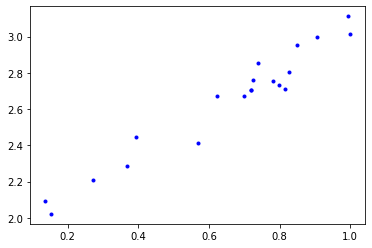

In [118]:
def make_noisy_data(m, b, n=20):
  x = tf.random.uniform(shape=(n,))
  noise = tf.random.normal(shape=(len(x),), stddev=0.1)
  y = m * x + b + noise
  return x, y

m=1
b=2
x_train, y_train = make_noisy_data(m,b)
plt.plot(x_train, y_train, 'b.')

#### Define the linear regression layer with model subclassing

In [119]:
class linear_layer(Layer):

  def __init__(self):
    super(linear_layer, self).__init__()
    self.m = self.add_weight(shape=(1,),
                             initializer='random_normal',
                             trainable=True)
    self.b = self.add_weight(shape=(1,),
                             initializer='random_normal',
                             trainable=True)
  def call(self, inputs):
    return self.m*inputs+self.b

linear_regression = linear_layer() 

print(linear_regression(x_train))
print(linear_regression.weights)

tf.Tensor(
[0.06456464 0.06968652 0.07973957 0.06021856 0.05511346 0.06440075
 0.05527481 0.06128107 0.08369915 0.06188967 0.06250501 0.06386448
 0.07557607 0.0609735  0.06782776 0.05824599 0.06527061 0.076438
 0.08428142 0.06456583], shape=(20,), dtype=float32)
[<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([-0.03385649], dtype=float32)>, <tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([0.08892126], dtype=float32)>]


#### Define the loss function

In [120]:
def squared_error(y_pred, y_true):
  return tf.reduce_mean(tf.square(y_pred - y_true)) 

starting_loss = squared_error(linear_regression(x_train), y_train)
print("Starting loss", starting_loss.numpy())

Starting loss 6.744391


#### Use `tf.GradientTape()` to obtain the gradients for the training loop

In [121]:
learning_rate = 0.05
steps = 25

for i in range(steps):
  
  with tf.GradientTape() as tape:
    predictions = linear_regression(x_train)
    loss = squared_error(predictions, y_train)
    
  gradients = tape.gradient(loss, linear_regression.trainable_variables)

  linear_regression.m.assign_sub(learning_rate * gradients[0])
  linear_regression.b.assign_sub(learning_rate * gradients[1])
 
  print("Step %d, Loss %f" % (i, loss.numpy()))

Step 0, Loss 6.744391
Step 1, Loss 4.934224
Step 2, Loss 3.610233
Step 3, Loss 2.641840
Step 4, Loss 1.933540
Step 5, Loss 1.415475
Step 6, Loss 1.036552
Step 7, Loss 0.759401
Step 8, Loss 0.556687
Step 9, Loss 0.408419
Step 10, Loss 0.299972
Step 11, Loss 0.220652
Step 12, Loss 0.162635
Step 13, Loss 0.120201
Step 14, Loss 0.089164
Step 15, Loss 0.066462
Step 16, Loss 0.049858
Step 17, Loss 0.037713
Step 18, Loss 0.028830
Step 19, Loss 0.022333
Step 20, Loss 0.017580
Step 21, Loss 0.014104
Step 22, Loss 0.011562
Step 23, Loss 0.009702
Step 24, Loss 0.008342


#### Print the trained values of m and b and plot the linear regression

m:1,  trained m:[1.15737]
b:2,  trained b:[1.8358296]


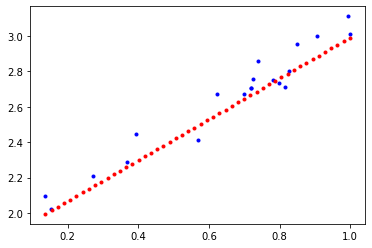

In [122]:
print("m:{},  trained m:{}".format(m,linear_regression.m.numpy()))
print("b:{},  trained b:{}".format(b,linear_regression.b.numpy()))

plt.plot(x_train, y_train, 'b.')

x_linear_regression=np.linspace(min(x_train), max(x_train),50)
plt.plot(x_linear_regression, linear_regression.m*x_linear_regression+linear_regression.b, 'r.')